<a href="https://colab.research.google.com/github/avni19/ML-DataCleaning-Basic/blob/master/Cleaning_Dataset_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing 
It is a technique that is used to convert the raw data into a clean data set.


# Need of Data Preprocessing
• For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner. Some specified Machine Learning model needs information in a specified format, for example, Random Forest algorithm does not support null values, therefore to execute random forest algorithm null values have to be managed from the original raw data set.
• Another aspect is that data set should be formatted in such a way that more than one Machine Learning and Deep Learning algorithms are executed in one data set, and best out of them is chosen.

In [63]:
from google.colab import drive                      #way to add upload drive files into juypter notebook
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [29]:
df = pd.read_excel("/content/drive/My Drive/Opendataset1.xlsx")
df


,Unnamed,0,Temperature,Humidity
0,0,0,1,1.0
1,1,1,NaN,NaN
2,2,2,3,31.0
3,3,3,2,22.0
4,4,4,3,33.0
5,5,5,1,11.0
6,6,6,2,21.0
7,7,7,N/a,24.0
8,8,8,1,12.0
9,9,9,na,32.0


In [30]:
df.isnull()

,Unnamed,0,Temperature,Humidity
0,False,False,False,False
1,False,False,True,True
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


# Detecting Missing Values

df.isnull().sum() will give us the count of missing values of the dataset

In [31]:
df.isnull().sum()

Unnamed        0
0              0
Temperature    1
Humidity       1
dtype: int64

From the above dataset , we can see we have NaN, N/a, na value into the dataset. So in pandas doesnt detect N/a and na values, it only detects NaN values. So what we are going to do is we are going to create a list of missing value.like as below

In [32]:
missing_values = ["N/a", "na"  ,np.nan]
df = pd.read_excel("/content/drive/My Drive/Opendataset1.xlsx", na_values = missing_values)
df.isnull().sum()

Unnamed        0
0              0
Temperature    3
Humidity       1
dtype: int64

now we getitng count of all the missing values of dataset. Another way is to use df.isnull().any() which tells the output as true or false. true means missing value is there and false means no missing value present

In [33]:
df.isnull().any()

Unnamed        False
0              False
Temperature     True
Humidity        True
dtype: bool

Apart from count and reflectiong boolean values, we can also visualize this using heatmap functions as below. 

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. 

annot – an array of same shape as data which is used to annotate the heatmap.

cmap – a matplotlib colormap name or object. This maps the data values to the color space.

fmt – string formatting code to use when adding annotations.

linewidths – sets the width of the lines that will divide each cell.

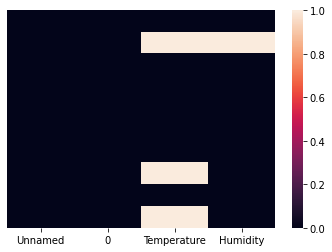

In [34]:
sns.heatmap(df.isnull(), yticklabels = False)

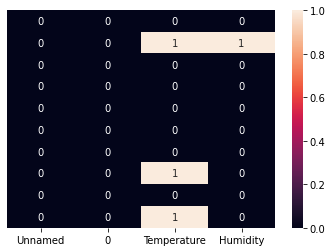

In [41]:
sns.heatmap(df.isnull(), yticklabels = False, annot = True)

# How to remove these missing values

In [42]:
df

,Unnamed,0,Temperature,Humidity
0,0,0,1.0,1.0
1,1,1,NaN,NaN
2,2,2,3.0,31.0
3,3,3,2.0,22.0
4,4,4,3.0,33.0
5,5,5,1.0,11.0
6,6,6,2.0,21.0
7,7,7,NaN,24.0
8,8,8,1.0,12.0
9,9,9,NaN,32.0


Now we want to drop the missing values . 


In [45]:
#df.dropna()    # this will drop all the rows which are having missing values
df.dropna(how = 'all')                   # this will drop only those rows for which all the columns values belong to missing values

,Unnamed,0,Temperature,Humidity
0,0,0,1.0,1.0
1,1,1,NaN,NaN
2,2,2,3.0,31.0
3,3,3,2.0,22.0
4,4,4,3.0,33.0
5,5,5,1.0,11.0
6,6,6,2.0,21.0
7,7,7,NaN,24.0
8,8,8,1.0,12.0
9,9,9,NaN,32.0


Now, rather than drooping we want to creat a new dataframe which is copy of original and let's start the with assigning all the null values with 0 using df1.fillna(0) function

In [46]:
df1 = df

In [48]:
df1.fillna(0)

,Unnamed,0,Temperature,Humidity
0,0,0,1.0,1.0
1,1,1,0.0,0.0
2,2,2,3.0,31.0
3,3,3,2.0,22.0
4,4,4,3.0,33.0
5,5,5,1.0,11.0
6,6,6,2.0,21.0
7,7,7,0.0,24.0
8,8,8,1.0,12.0
9,9,9,0.0,32.0


Apart from filling missing values with zeros, there is also a way of filling it using forward and backward values as below

In [51]:
df1.fillna(method = 'bfill')    # #it will copy the data from the below column

,Unnamed,0,Temperature,Humidity
0,0,0,1.0,1.0
1,1,1,3.0,31.0
2,2,2,3.0,31.0
3,3,3,2.0,22.0
4,4,4,3.0,33.0
5,5,5,1.0,11.0
6,6,6,2.0,21.0
7,7,7,1.0,24.0
8,8,8,1.0,12.0
9,9,9,NaN,32.0


In [54]:
df1.fillna(method = 'ffill')  #it will copy the data from the above column

,Unnamed,0,Temperature,Humidity
0,0,0,1.0,1.0
1,1,1,1.0,1.0
2,2,2,3.0,31.0
3,3,3,2.0,22.0
4,4,4,3.0,33.0
5,5,5,1.0,11.0
6,6,6,2.0,21.0
7,7,7,2.0,24.0
8,8,8,1.0,12.0
9,9,9,1.0,32.0


In [61]:
 df1.interpolate() # also there is a interpolate method, it takes average of upper and lower column and place value in missing values.

,Unnamed,0,Temperature,Humidity
0,0,0,1.0,1.0
1,1,1,2.0,16.0
2,2,2,3.0,31.0
3,3,3,2.0,22.0
4,4,4,3.0,33.0
5,5,5,1.0,11.0
6,6,6,2.0,21.0
7,7,7,1.5,24.0
8,8,8,1.0,12.0
9,9,9,1.0,32.0


Also, if we want we can substitute the nan value with the value which we want. suppose we want to remove all null value with 8 . Lets see

In [62]:
df1.fillna(  {
    'Temperature' : 8
})

,Unnamed,0,Temperature,Humidity
0,0,0,1.0,1.0
1,1,1,8.0,NaN
2,2,2,3.0,31.0
3,3,3,2.0,22.0
4,4,4,3.0,33.0
5,5,5,1.0,11.0
6,6,6,2.0,21.0
7,7,7,8.0,24.0
8,8,8,1.0,12.0
9,9,9,8.0,32.0
